In [23]:
# EXPERIMENTAL MODEL
# Testing varying OAT1 densities 

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd
 
V_Cell_Monolayer = 3.2e-07
V_Mem = 0.0032
V_Well = 0.0001
 
initial_OAT1 = 0.190962
initial_PCS_C = 0
initial_PCS_OAT1 = 0
Km_Efflux = 69
KMOLE = 0.00166054
Kr_Uptake = 0.000
Kr_dissociation = 0.000
Vmax_Efflux = 1.0e-05 * 23418 * KMOLE
 

#Uremic
initial_PCS_B = 200
Kf_Uptake = 1.99e-5
Kf_dissociation = 4.05e-04

#Healthy 
#initial_PCS_B = 10
#Kf_Uptake = 1.44e-5
#Kf_dissociation = 5.78e-04

params = [Kf_Uptake, Kr_Uptake, Kf_dissociation, Kr_dissociation, Vmax_Efflux, Km_Efflux, V_Mem, V_Well, V_Cell_Monolayer]
 
def model(t, y, params):
 
    # Unpack state variables
    PCS_B, OAT1,  PCS_OAT1, PCS_C  = y
 
    Kf_Uptake, Kr_Uptake, Kf_dissociation, Kr_dissociation, Vmax_Efflux, Km_Efflux, V_Mem, V_Well, V_Cell_Monolayer = params
 
    dPCS_Bdt = (-((Kf_Uptake * OAT1 * PCS_B + (-Kr_Uptake * PCS_OAT1)) * V_Mem) + ( (Vmax_Efflux * PCS_C) / ( Km_Efflux + PCS_C)) * V_Mem) / V_Well
 
    dOAT1dt = (-((Kf_Uptake * OAT1 * PCS_B + (-Kr_Uptake * PCS_OAT1)) * V_Mem) + (
            (Kf_dissociation * PCS_OAT1 + (-Kr_dissociation * OAT1 * PCS_C)) * V_Mem)) / V_Mem
 
    dPCS_OAT1dt = (((Kf_Uptake * OAT1 * PCS_B + (-Kr_Uptake * PCS_OAT1)) * V_Mem) - (
            (Kf_dissociation * PCS_OAT1 + (-Kr_dissociation * OAT1 * PCS_C)) * V_Mem)) / V_Mem
    
    dPCS_Cdt = ((-( Vmax_Efflux * PCS_C) / (Km_Efflux + PCS_C ) * V_Mem) +
               ((Kf_dissociation * PCS_OAT1 + (-Kr_dissociation * OAT1 * PCS_C)) * V_Mem)) / V_Cell_Monolayer
 
    return [dPCS_Bdt, dOAT1dt, dPCS_OAT1dt, dPCS_Cdt]
 
 
# Initial conditions for the state variables
y0 = [initial_PCS_B, initial_OAT1, initial_PCS_OAT1, initial_PCS_C]
 
t_span = (0, 8000)
 

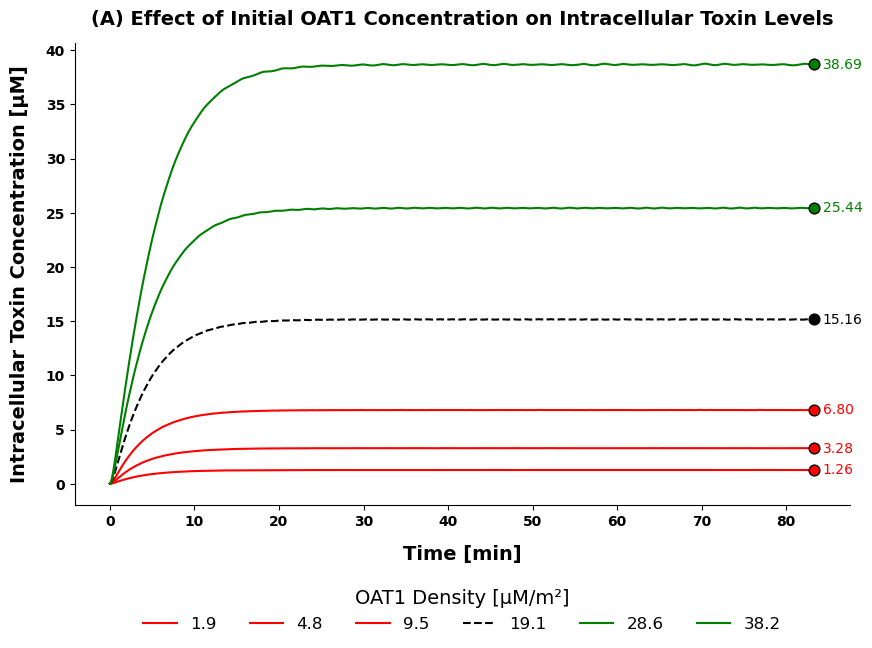

In [24]:
# Define initial OAT1 concentrations to test
initial_OAT1_values = [0.019, 0.048, 0.095, 0.1910, 0.286, 0.382]
baseline_OAT1 = 0.191  # Baseline value for reference

# Set time span and evaluation points (in seconds)
t_span = (0, 5000)
t_eval = np.linspace(0, 5000, 1000)

plt.figure(figsize=(10, 6))

# Run simulations for each initial OAT1 concentration
for initial_OAT1 in initial_OAT1_values:
    # Initial conditions with varying OAT1
    y0 = [initial_PCS_B, initial_OAT1, initial_PCS_OAT1, initial_PCS_C]

    # Solve the system
    solution = solve_ivp(model, t_span, y0, args=(params,), t_eval=t_eval)

    # Set color and line style
    if initial_OAT1 > baseline_OAT1:
        color = 'green'
        linestyle = '-'
    elif initial_OAT1 < baseline_OAT1:
        color = 'red'
        linestyle = '-'
    else:
        color = 'black'  # Baseline value
        linestyle = '--'  # Solid line for baseline

    # Plot the results
    label = f'{initial_OAT1 * 100:.1f}'  # Display in μM/m²
    plt.plot(solution.t / 60, solution.y[3], linestyle=linestyle, color=color, label=label)  # Convert time to minutes
    # Add the final points to the graph
    final_time = solution.t[-1] / 60  # Convert time to minutes
    final_concentration = solution.y[3, -1]
    plt.scatter(final_time, final_concentration, color=color, s=60, edgecolor='black', zorder=5)
    plt.text(
        final_time + 1, final_concentration, f'{final_concentration:.2f}',  # Add a small offset for clarity
        fontsize=10, color=color, va='center'
    )

# Customize the plot
plt.xlabel('Time [min]', fontsize=14, fontweight='bold', labelpad=12)
plt.ylabel('Intracellular Toxin Concentration [µM]', fontsize=14, fontweight='bold', labelpad=12)
plt.title('(A) Effect of Initial OAT1 Concentration on Intracellular Toxin Levels', fontsize=14, fontweight='bold', pad=13)
plt.legend(
    title="OAT1 Density [μM/m²]", 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.15),  # Position below the graph
    fontsize=12, 
    title_fontsize=14,  # Make title font bigger
    ncol=len(initial_OAT1_values),  # Arrange all items in one row
    frameon=False,
)    
plt.xticks(np.arange(0, 5000 / 60 + 1, 10), fontsize=10, fontweight='bold')  # Every 10 minutes, convert to minutes
plt.yticks(fontsize=10, fontweight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('OAT1_Density_1.png', dpi=300)
plt.show()


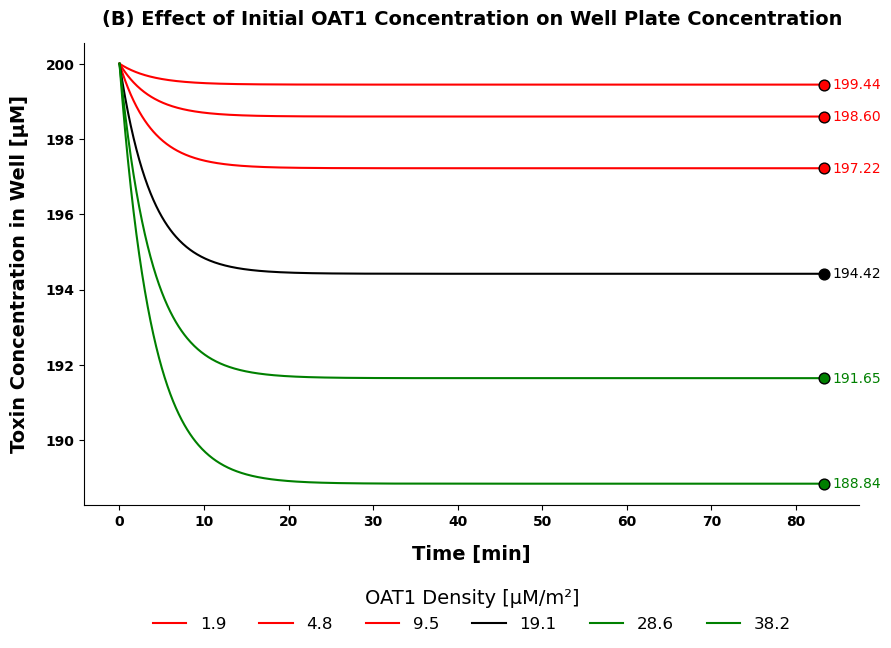

In [20]:
# Toxin in Cell
plt.figure(figsize=(10, 6))

# Run simulations for each initial OAT1 concentration
for initial_OAT1 in initial_OAT1_values:
    # Initial conditions with varying OAT1
    y0 = [initial_PCS_B, initial_OAT1, initial_PCS_OAT1, initial_PCS_C]

    # Solve the system
    solution = solve_ivp(model, t_span, y0, args=(params,), t_eval=t_eval)

    # Set color and line style
    if initial_OAT1 > baseline_OAT1:
        color = 'green'
        linestyle = '-'
    elif initial_OAT1 < baseline_OAT1:
        color = 'red'
        linestyle = '-'
    else:
        color = 'black'  # Baseline value
        linestyle = '-'  # Solid line for baseline

    # Plot the results
    label = f'{initial_OAT1 * 100:.1f}'  # Display in μM/m²
    plt.plot(solution.t / 60, solution.y[0], linestyle=linestyle, color=color, label=label)  # Convert time to minutes
    # Add the final points to the graph
    final_time = solution.t[-1] / 60  # Convert time to minutes
    final_concentration = solution.y[0, -1]
    plt.scatter(final_time, final_concentration, color=color, s=60, edgecolor='black', zorder=5)
    plt.text(
        final_time + 1, final_concentration, f'{final_concentration:.2f}',  # Add a small offset for clarity
        fontsize=10, color=color, va='center'
    )

# Customize the plot
plt.xlabel('Time [min]', fontsize=14, fontweight='bold', labelpad=12)
plt.ylabel('Toxin Concentration in Well [µM]', fontsize=14, fontweight='bold', labelpad=12)
plt.title('(B) Effect of Initial OAT1 Concentration on Well Plate Concentration', fontsize=14, fontweight='bold', pad=13)
plt.legend(
    title="OAT1 Density [μM/m²]", 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.15),  # Position below the graph
    fontsize=12, 
    title_fontsize=14,  # Make title font bigger
    ncol=len(initial_OAT1_values),  # Arrange all items in one row
    frameon=False
)

plt.xticks(np.arange(0, 5000 / 60 + 1, 10), fontsize=10, fontweight='bold')  # Every 10 minutes, convert to minutes
plt.yticks(fontsize=10, fontweight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('OAT1_Density_2.png', dpi=300)
plt.show()
